#mount Google Drive

In [1]:
# conect to google drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

## Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/Folder_ch3_exe3"

Mounted at /content/drive


#  imort libraries & load data

In [2]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tf.__version__

'2.17.0'

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape,y_train.shape,  x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# data prepration

In [4]:
tf.data.experimental.enable_debug_mode()

In [5]:
# reshap/flatten data
X_train = x_train.reshape(-1, 3072)  # -1 ??
X_test_n = x_test.reshape(-1, 3072)
#X_test_n = X_test_flat
X_train.shape ,X_test_n.shape, y_train.shape

((50000, 3072), (10000, 3072), (50000, 1))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# train_test_split ---> val_size = 0.2

X_train_n, X_val_n, y_train_n, y_val_n =train_test_split(X_train ,y_train,test_size=0.2, random_state= 40,shuffle=True , stratify=None)

In [8]:
X_train_n.shape, X_val_n.shape , y_train_n.shape, y_val_n.shape #,x_test.shape, y_test.shape

((40000, 3072), (10000, 3072), (40000, 1), (10000, 1))

In [9]:
# standardization
X_train_n,X_val_n,  X_test_n, = X_train_n /255,X_val_n/255 , X_test_n/255
#y_train_ohe = y_train_ohe.reshape(510000,)  # ????????????????????????????
X_train_n.shape ,#y_train_ohe. shape

((40000, 3072),)

In [10]:
#### سوال
# در فرمت کنونی برای لایه آخر شبکه عصبی از چه لاس ای استفاده می‌کنید؟
## پاسخ  : SparseCategoricalCrossEntropy

In [11]:
#فرمت خروجی را به گونه‌ای تغییر دهید که بتوانیم برای لایه‌ی آخر از CategoricalCrossEntropy به عنوان Loss استفاده کنیم.
## convert target to OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train_n) .toarray()
y_val_ohe = ohe.fit_transform(y_val_n) .toarray()
y_test_ohe = ohe.fit_transform(y_test).toarray()
y_train_ohe.shape,y_test_ohe.shape

((40000, 10), (10000, 10))

# Deep sequential model ---- activation : selu

In [ ]:
# activation function : selu +  self_normalization
# define model

def create_model_selu():
    model = tf.keras.Sequential([
           keras.layers.Dense(units =50, kernel_initializer= keras.initializers.LecunNormal(seed=None), input_shape=(3072,)),
           keras.layers.Activation(activation='selu'),
           keras.layers.Dense(units= 100, activation='selu', kernel_initializer= keras.initializers.LecunNormal(seed=None) ),
           keras.layers.Dense(units= 10, activation='softmax')])
    model.compile(optimizer= 'sgd', loss= 'categorical_crossentropy',metrics= ['accuracy'])
    return model


In [ ]:
#create model & callbacks
model= create_model_selu()
checkpoint_path_1 = "/content/drive/MyDrive/Folder_ch3_exe3/SL_modelchekpoint.keras"

SL_callbacks = [ #keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_1,  monitor='val_loss', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )] #
# if interupt use the weights and continue training with adjusted  number of epochs
#model.load_weights(checkpoint_path_1)

In [ ]:
#  train model
SL_model_history = model.fit(X_train_n, y_train_ohe, epochs=50, validation_data= (X_val_n,y_val_ohe),callbacks=SL_callbacks)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.3385 - loss: 1.8887 - val_accuracy: 0.3889 - val_loss: 1.7725
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.4249 - loss: 1.6479 - val_accuracy: 0.4030 - val_loss: 1.6883
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.4414 - loss: 1.5920 - val_accuracy: 0.4044 - val_loss: 1.6807
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.4562 - loss: 1.5549 - val_accuracy: 0.3914 - val_loss: 1.7050
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - accuracy: 0.4710 - loss: 1.5037 - val_accuracy: 0.4005 - val_loss: 1.7439
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.4827 - loss: 1.4797 - val_accuracy: 0.4541 - val_loss: 1.5535
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.4878 - loss: 1.4611 - val_accuracy: 0.4602 - val_loss: 1.5700
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.4975 -

In [ ]:
# save model & history

model_path= "/content/drive/My Drive/Folder_ch3_exe3/SL_model.keras"
model.save(model_path)

import pickle
#  path for save the pickle file
pickle_path = "/content/drive/My Drive/Folder_ch3_exe3/SL_model_history.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(SL_model_history.history, pickle_file)

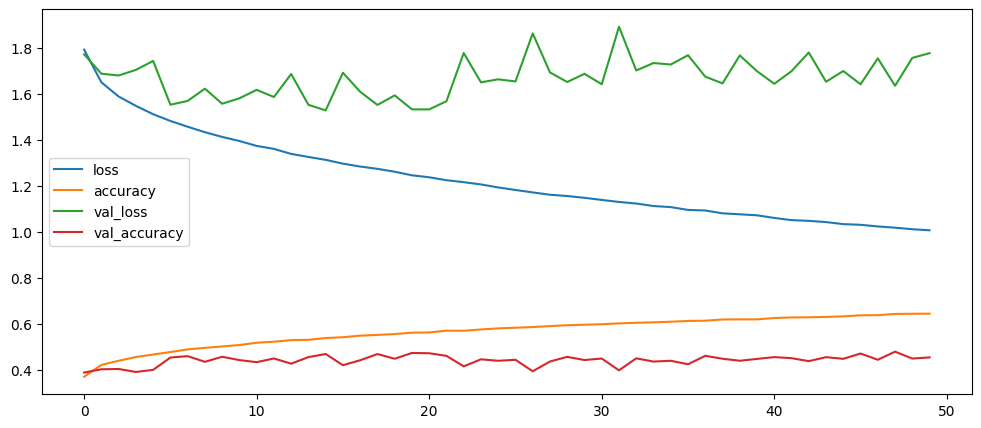

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(SL_model_history.history['loss'], label='loss')
ax.plot(SL_model_history.history['accuracy'], label='accuracy')
ax.plot(SL_model_history.history['val_loss'], label='val_loss')
ax.plot(SL_model_history.history['val_accuracy'], label='val_accuracy')
ax.legend()

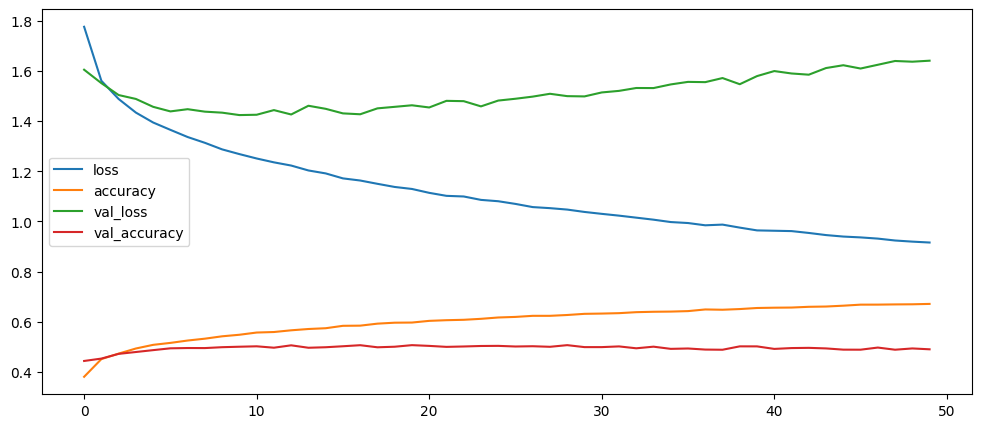

In [ ]:
# the first layer of model is used BachNormalization ---> the graph is smoother
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(model_history.history['loss'], label='loss')
ax.plot(model_history.history['accuracy'], label='accuracy')
ax.plot(model_history.history['val_loss'], label='val_loss')
ax.plot(model_history.history['val_accuracy'], label='val_accuracy')
ax.legend()

# model : activation---> leaky relu

In [ ]:

# define model  : activation---> leaky relu

def create_model_LR():
    model = tf.keras.Sequential([
           #keras.layers.BatchNormalization(),
           keras.layers.Dense(units =50,  input_shape=(3072,),kernel_initializer='he_normal'),
           keras.layers.LeakyReLU(alpha=0.3),
           keras.layers.BatchNormalization(),
           keras.layers.Dense(units= 100,kernel_initializer='he_normal'),
           keras.layers.LeakyReLU(alpha = 0.3),
           keras.layers.BatchNormalization(),
           keras.layers.Dense(units= 10, activation='softmax')])
    model.compile(optimizer= 'sgd', loss= 'categorical_crossentropy',metrics= ['accuracy'])
    return model

In [ ]:
model_1= create_model_LR()
model_1_history = model_1.fit(X_train_n, y_train_ohe, epochs=50, validation_data= (X_val_n,y_val_ohe))

Epoch 1/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 65s 51ms/step - accuracy: 0.3247 - loss: 1.9372 - val_accuracy: 0.4007 - val_loss: 1.7292
Epoch 2/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.4131 - loss: 1.6732 - val_accuracy: 0.4048 - val_loss: 1.6834
Epoch 3/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 70s 55ms/step - accuracy: 0.4385 - loss: 1.6111 - val_accuracy: 0.4156 - val_loss: 1.6401
Epoch 4/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 65s 51ms/step - accuracy: 0.4525 - loss: 1.5660 - val_accuracy: 0.4342 - val_loss: 1.6077
Epoch 5/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 65s 51ms/step - accuracy: 0.4692 - loss: 1.5202 - val_accuracy: 0.4003 - val_loss: 1.7026
Epoch 6/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 65s 51ms/step - accuracy: 0.4752 - loss: 1.5053 - val_accuracy: 0.4453 - val_loss: 1.5745
Epoch 7/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.4814 - loss: 1.4759 - val_accuracy: 0.4204 - val_loss: 1.7014
Epoch 8/50
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 65s 51ms/step - accuracy: 0.4893 -

In [ ]:
# save history
import pickle
# Specify the path where you want to save the pickle file
pickle_path_1 = "/content/drive/My Drive/My Folder8/model_1_history.pkl"

# Save the dictionary as a pickle file
with open(pickle_path_1, 'wb') as pickle_file:
    pickle.dump(model_1_history.history, pickle_file)

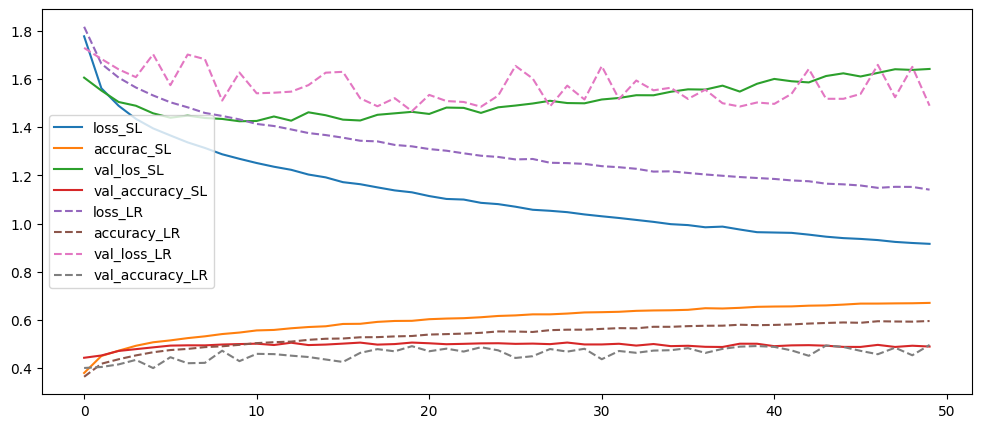

In [ ]:
# Graph
fig, ax = plt.subplots(figsize=(12,5))
# selu activation
ax.plot(model_history.history['loss'], label='loss_SL')
ax.plot(model_history.history['accuracy'], label='accurac_SL')
ax.plot(model_history.history['val_loss'], label='val_los_SL')
ax.plot(model_history.history['val_accuracy'], label='val_accuracy_SL')
# leakyRelu activation
ax.plot(model_1_history.history['loss'], label='loss_LR',linestyle='dashed')
ax.plot(model_1_history.history['accuracy'], label='accuracy_LR',linestyle='dashed')
ax.plot(model_1_history.history['val_loss'], label='val_loss_LR',linestyle='dashed')
ax.plot(model_1_history.history['val_accuracy'], label='val_accuracy_LR',linestyle='dashed')
ax.legend()

# Transfer_learning

In [ ]:
model_best= keras.models.load_model('/content/drive/MyDrive/Folder_ch3_exe3/SL_model.keras')
model_best.load_weights('/content/drive/MyDrive/Folder_ch3_exe3/SL_modelchekpoint.keras')

In [ ]:
model_best.get_weights()[0]


array([[-0.03313119, -0.00678901, -0.04310467, ..., -0.02234354,
         0.02595495, -0.04198036],
       [-0.05769468,  0.02968961, -0.07446042, ..., -0.01059062,
         0.04746962,  0.02196683],
       [ 0.00234057, -0.00846143, -0.06762131, ..., -0.05578372,
         0.01935529,  0.02846684],
       ...,
       [-0.04284767, -0.01272093,  0.02285207, ...,  0.01985887,
         0.02459863, -0.00341578],
       [-0.02767811, -0.0010355 , -0.00699935, ..., -0.04399301,
        -0.01782579,  0.04009678],
       [-0.02069557,  0.01390829,  0.01299765, ..., -0.06131982,
         0.05698243,  0.00426312]], dtype=float32)

In [ ]:
built_model = keras.models.Sequential(model_best.layers[:-1])
built_model.add(keras.layers.Dense(1,activation='sigmoid',name='new_layer'))
built_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ new_layer (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,950 (620.90 KB)

 Trainable params: 158,850 (620.51 KB)

 Non-trainable params: 100 (400.00 B)

In [ ]:
# compile model
built_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# predict y as horse=7 or not
y_train_hor = np.where(y_train==7,1,0)[:6000]
y_test_hor = np.where(y_test==7,1,0)[:1000]

X_train_hor6 = X_train_n[:6000,:]
X_test_hor6 = X_test_n[:1000,:]

y_train_hor.sum()

597

In [ ]:
for layers in built_model.layers[:-1]:
  layers.trainable = False
  print(layers.trainable)


True
True
True
True


In [ ]:
#fit model and get duration time with 4 frozen layers in built_model
import time
start_time = time.time()

built_mode1_history = built_model.fit(x=X_train_hor6,y=y_train_hor, epochs=10, validation_split=0.)#,callbacks=model1_callbacks)

end_time = time.time()
print(f"Total training time for 5  epochs _4frozen layers:   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = built_model.evaluate(X_train_hor6,y_train_hor)
print(f"accuracy for 10 epochs  and 4 frozen layers in model is :   {accuracy}  . ",end='\n')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7521 - loss: 0.5706
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8854 - loss: 0.3642
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9038 - loss: 0.3367
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8985 - loss: 0.3495
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9019 - loss: 0.3334
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8936 - loss: 0.3499
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8990 - loss: 0.3346
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9115 - loss: 0.3085
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8993 - loss: 0.3384
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9079 - loss: 0.3148
Total training time for 5  epochs _4frozen layers:   73.30   seconds.
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9012 - loss

In [ ]:
#fit model and get duration time with 4 trainable layers in built_model
import time
start_time = time.time()

built_mode1_history = built_model.fit(x=X_train_hor6,y=y_train_hor, epochs=10, validation_split=0.)#,callbacks=model1_callbacks)

end_time = time.time()
print(f"Total training time for 5  epochs _4frozen layers:   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = built_model.evaluate(X_train_hor6,y_train_hor)
print(f"accuracy for 10 epochs  and 4 trainable layers in model is :   {accuracy}  . ",end='\n')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7579 - loss: 0.5403
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8968 - loss: 0.3511
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8955 - loss: 0.3413
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9077 - loss: 0.3056
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9039 - loss: 0.3099
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8993 - loss: 0.3152
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8917 - loss: 0.3242
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9018 - loss: 0.3014
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8976 - loss: 0.3039
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8988 - loss: 0.3018
Total training time for 5  epochs _4frozen layers:   91.14   seconds.
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9052 - lo

In [ ]:
# در اينجا مدل اوليه را در گوگل درايو ذخيره دارم و لذا از كلون كردن استفاده نكردم

# اين مدل كلون شده بدون تغيير حفظ مي شود و فقط يكبار اجرا كنم
#model0_cloned= keras.models.clone_model(model0)
#model0_cloned .set_weights(model0.get_weights())

#cloned_path= "/content/drive/My Drive/Folder_ch3_exe3/model0_cloned.keras"
#model0_cloned .save(cloned_path)

# optimizers


In [ ]:
model = create_model_selu()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# loss and accuracy are saved in  : SL_model_history
import pickle
pickle_path = "/content/drive/My Drive/Folder_ch3_exe3/SL_model_history.pkl"

with open(pickle_path,'rb')as file:
     SL_model_history = pickle.load(file)

In [ ]:
# define model:
def create_model_selu():
    model = tf.keras.Sequential([
           keras.layers.Dense(units =50, kernel_initializer= keras.initializers.LecunNormal(seed=None), input_shape=(3072,)),
         keras.layers.BatchNormalization(),
           keras.layers.Activation(activation='selu'),
           keras.layers.Dense(units= 100, activation='selu', kernel_initializer= keras.initializers.LecunNormal(seed=None) ),
           keras.layers.Dense(units= 10, activation='softmax')])
    opt = keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov= True)
    model.compile(optimizer= opt, loss= 'categorical_crossentropy',metrics= ['accuracy'])
    return model

#create model & callbacks
model= create_model_selu()
checkpoint_path_1 = "/content/drive/MyDrive/Folder_ch3_exe3/SL_modelchekpoint.keras" # sgd
checkpoint_path_adam = "/content/drive/MyDrive/Folder_ch3_exe3/adam_modelchekpoint.keras"
checkpoint_path_nadam = "/content/drive/MyDrive/Folder_ch3_exe3/nadam_modelchekpoint.keras"
checkpoint_path_adagrad = "/content/drive/MyDrive/Folder_ch3_exe3/adagrad_modelchekpoint.keras"
checkpoint_path_sgdm = "/content/drive/MyDrive/Folder_ch3_exe3/sgdm_modelchekpoint.keras"
checkpoint_path_sgdmnv = "/content/drive/MyDrive/Folder_ch3_exe3/sgdmnv_modelchekpoint.keras"

callbacks = [keras.callbacks.ModelCheckpoint(checkpoint_path_sgdmnv,  monitor='val_loss', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]
#  train model
sgdmnv_model_history = model.fit(X_train_n, y_train_ohe, epochs=50, validation_data= (X_val_n,y_val_ohe),callbacks=callbacks)

print('-------------training was finished------------')

# save  model & history
sgdmnv_model_path= "/content/drive/My Drive/Folder_ch3_exe3/sgdmnv_model.keras"
model.save(sgdmnv_model_path)

import pickle
#  path for save the pickle file
history_path_sgdmnv = "/content/drive/My Drive/Folder_ch3_exe3/sgdmnv_model_history.pkl"
# Save the dictionary as a pickle file
with open(history_path_sgdmnv, 'wb') as pickle_file:
    pickle.dump(sgdmnv_model_history.history, pickle_file)

print('----------------sgdmnv files were saved------------')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.3237 - loss: 1.8977 - val_accuracy: 0.3463 - val_loss: 1.8685
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.4123 - loss: 1.6580 - val_accuracy: 0.3699 - val_loss: 1.8277
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.4423 - loss: 1.5671 - val_accuracy: 0.3983 - val_loss: 1.7152
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.4555 - loss: 1.5281 - val_accuracy: 0.4499 - val_loss: 1.5438
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.4778 - loss: 1.4680 - val_accuracy: 0.4176 - val_loss: 1.6505
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - accuracy: 0.4938 - loss: 1.4413 - val_accuracy: 0.4242 - val_loss: 1.6556
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.4963 - loss: 1.4093 - val_accuracy: 0.4376 - val_loss: 1.6254
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 58ms/step - accuracy: 0.5102 -

In [ ]:
import pickle
history_path = "/content/drive/My Drive/Folder_ch3_exe3/SL_model_history.pkl"
# load the dictionary as a pickle file
with open(history_path, 'rb') as pickle_file:
 SL_model_history = pickle.load(pickle_file)

In [ ]:
nadam_model_history
adagrad_model_history
sgdm_model_history
sgdmnv_model_history
SL_model_history
adam_model_history

{'accuracy': [0.36970001459121704,
  0.42719998955726624,
  0.4516749978065491,
  0.47200000286102295,
  0.4854249954223633,
  0.5006499886512756,
  0.5115500092506409,
  0.520924985408783,
  0.5343999862670898,
  0.5432000160217285,
  0.54892498254776,
  0.5559250116348267,
  0.5608749985694885,
  0.5656750202178955,
  0.5725250244140625,
  0.5769500136375427,
  0.5817000269889832,
  0.5862249732017517,
  0.5902000069618225,
  0.5940750241279602,
  0.5983250141143799,
  0.6023749709129333,
  0.6084499955177307,
  0.6105750203132629,
  0.6156250238418579,
  0.6147750020027161,
  0.6217250227928162,
  0.6242250204086304,
  0.6267250180244446,
  0.6301000118255615,
  0.6315249800682068,
  0.6359249949455261,
  0.6368250250816345,
  0.6420249938964844,
  0.6438249945640564,
  0.6456249952316284,
  0.6509749889373779,
  0.6507999897003174,
  0.6528499722480774,
  0.65767502784729,
  0.6576499938964844,
  0.6597999930381775,
  0.6633250117301941,
  0.6626999974250793,
  0.6655499935150146,


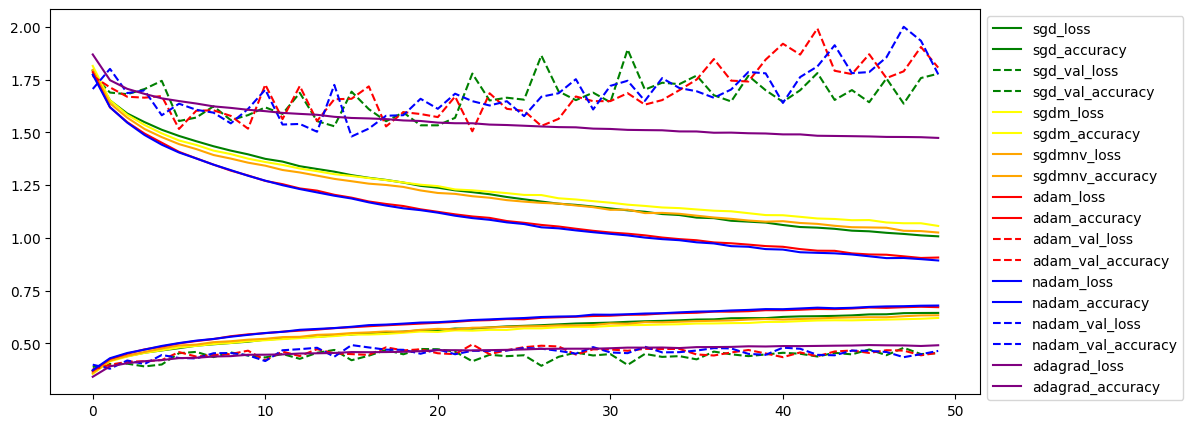

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(SL_model_history['loss'], label='sgd_loss',color='green')
ax.plot(SL_model_history['accuracy'], label='sgd_accuracy',color='green')
ax.plot(SL_model_history['val_loss'], label='sgd_val_loss',color='green',linestyle='--')
ax.plot(SL_model_history['val_accuracy'], label='sgd_val_accuracy',color='green',linestyle='--')

ax.plot(sgdm_model_history['loss'], label='sgdm_loss',color='yellow')
ax.plot(sgdm_model_history['accuracy'], label='sgdm_accuracy',color='yellow')

ax.plot(sgdmnv_model_history['loss'], label='sgdmnv_loss',color='orange')
ax.plot(sgdmnv_model_history['accuracy'], label='sgdmnv_accuracy',color='orange')

ax.plot(adam_model_history['loss'], label='adam_loss',color='red')
ax.plot(adam_model_history['accuracy'], label='adam_accuracy',color='red')
ax.plot(adam_model_history['val_loss'], label='adam_val_loss',color='red',linestyle='--')
ax.plot(adam_model_history['val_accuracy'], label='adam_val_accuracy',color='red',linestyle='--')

ax.plot(nadam_model_history['loss'], label='nadam_loss',color='blue')
ax.plot(nadam_model_history['accuracy'], label='nadam_accuracy',color='blue')
ax.plot(nadam_model_history['val_loss'], label='nadam_val_loss',color='blue', linestyle='--')
ax.plot(nadam_model_history['val_accuracy'], label='nadam_val_accuracy',color='blue', linestyle='--')

ax.plot(adagrad_model_history['loss'], label='adagrad_loss',color='purple')
ax.plot(adagrad_model_history['accuracy'], label='adagrad_accuracy',color='purple')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

#regularizers:

In [ ]:
model_l2_do = tf.keras.Sequential([
      #keras.layers.Dropout(rate=0.2),
      keras.layers.Dense(units =50,input_shape=(3072,),
                         kernel_initializer= keras.initializers.LecunNormal(seed=None),
                         kernel_regularizer=keras.regularizers.l2(l2=0.01)),
      keras.layers.Activation(activation='selu'),
      # keras.layers.Dropout(rate=0.2),
      #keras.layers.BatchNormalization(),
      keras.layers.Dense(units= 100, activation='selu', kernel_initializer= keras.initializers.LecunNormal(seed=None) ),
      keras.layers.Dropout(rate=0.2),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(units= 10, activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
opt = keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov= True)
model_l2_do.compile(optimizer= 'adam', loss= 'categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
#  train model\
tf.data.experimental.enable_debug_mode()
checkpoint_path_regularize = "/content/drive/MyDrive/Folder_ch3_exe3/l2do_regularizer_modelchekpoint.keras"
callbacks = [keras.callbacks.ModelCheckpoint(checkpoint_path_regularize,  monitor='val_loss', verbose = 0, mode ='auto', save_freq = 'epoch',
                                             save_best_only = True )]
l2do_regularizer_model_history = model_l2_do.fit(X_train_n, y_train_ohe, epochs=100, validation_data= (X_val_n,y_val_ohe),callbacks=callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.2743 - loss: 2.2315 - val_accuracy: 0.2490 - val_loss: 2.2771
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.3263 - loss: 1.9700 - val_accuracy: 0.2789 - val_loss: 2.0731
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.3385 - loss: 1.9411 - val_accuracy: 0.2913 - val_loss: 2.0346
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 102s 82ms/step - accuracy: 0.3445 - loss: 1.9190 - val_accuracy: 0.2870 - val_loss: 2.1186
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - accuracy: 0.3506 - loss: 1.9113 - val_accuracy: 0.2556 - val_loss: 2.1083
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.3573 - loss: 1.8890 - val_accuracy: 0.2806 - val_loss: 2.1098
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 111s 89ms/step - accuracy: 0.3571 - loss: 1.8731 - val_accuracy: 0.3409 - val_loss: 1.9563
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - ac

In [ ]:

print('-------------training was finished------------')
# save  model & history
model_path= "/content/drive/My Drive/Folder_ch3_exe3/l2_do_regularizer_model.keras"
model_l2_do.save(model_path)

import pickle
#  path for save the pickle file
history_path_regularize = "/content/drive/My Drive/Folder_ch3_exe3/l2_do_regularizer_modelhistory.pkl"
# Save the dictionary as a pickle file
with open(history_path_regularize, 'wb') as pickle_file:
    pickle.dump(l2do_regularizer_model_history.history, pickle_file)

print('----------------regularize files were saved------------')

-------------training was finished------------
----------------regularize files were saved------------


In [ ]:
import pickle
path ='/content/drive/MyDrive/Folder_ch3_exe3/l2_do_regularizer_modelhistory.pkl'
with open(path,mode='rb')as pickle_file:
  l2do_history= pickle.load(pickle_file)
path1 = '/content/drive/MyDrive/Folder_ch3_exe3/adam_model_history.pkl'
with open(path1,mode='rb')as pickle_file:
  No_reguliz_history= pickle.load(pickle_file)


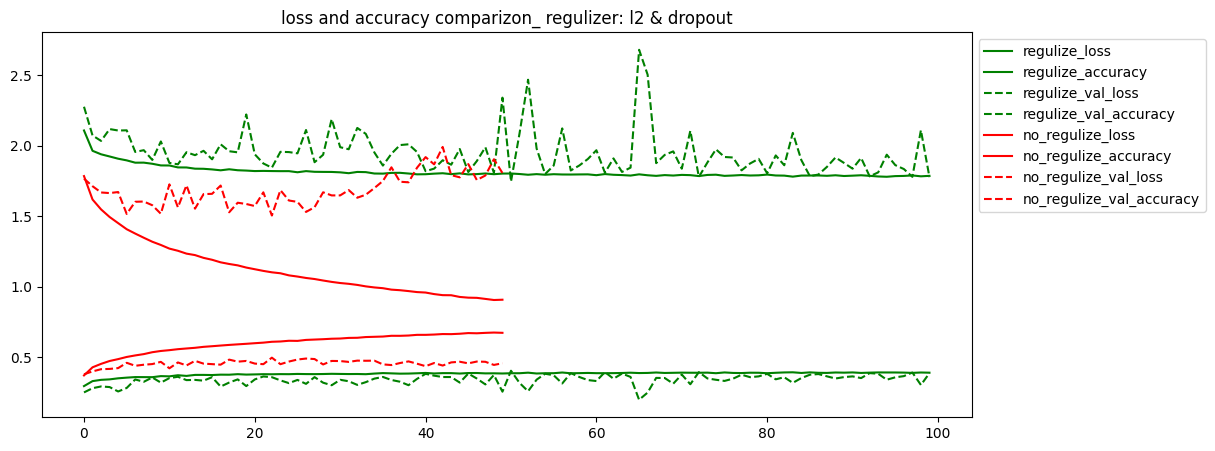

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot( l2do_history['loss'], label='regulize_loss',color='green')
ax.plot( l2do_history['accuracy'], label='regulize_accuracy',color='green')
ax.plot( l2do_history['val_loss'], label='regulize_val_loss',color='green',linestyle='--')
ax.plot( l2do_history['val_accuracy'], label='regulize_val_accuracy',color='green',linestyle='--')

ax.plot(  No_reguliz_history['loss'], label='no_regulize_loss',color='red')
ax.plot(  No_reguliz_history['accuracy'], label='no_regulize_accuracy',color='red')
ax.plot(  No_reguliz_history['val_loss'], label='no_regulize_val_loss',color='red',linestyle='--')
ax.plot(  No_reguliz_history['val_accuracy'], label='no_regulize_val_accuracy',color='red',linestyle='--')

plt.title("loss and accuracy comparizon_ regulizer: l2 & dropout")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [ ]:
# در نمودار خطوط قرمز اور فیت قبل از رگیولارایزیشن  کاملا مشخص است
# بعد از رگیولارایز کردن خطوط سبز اور فیت حذف شده اما دقت هم کمتر شده است

In [ ]:
#  the model have overfit  befor regularization : accuracy of train is much bigger than validation and test sets.

unregulized_model = keras.models.load_model('/content/drive/MyDrive/Folder_ch3_exe3/adam_model.keras')
unregulized_model.load_weights('/content/drive/MyDrive/Folder_ch3_exe3/adam_modelchekpoint.keras')
unregulized_model.evaluate(X_train_n,y_train_ohe),unregulized_model.evaluate(X_val_n,y_val_ohe),unregulized_model.evaluate(X_test_n,y_test_ohe)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6155 - loss: 1.0657
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5044 - loss: 1.4900
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4859 - loss: 1.4953


([1.0651193857192993, 0.618399977684021],
 [1.5049078464508057, 0.49570000171661377],
 [1.5085899829864502, 0.48260000348091125])

In [ ]:
#  the model don't have overfit  after regularization with l2 & Dropout but the accuracy  has decrized totaly

regulized_model = keras.models.load_model('/content/drive/MyDrive/Folder_ch3_exe3/l2_do_regularizer_model.keras')
regulized_model.load_weights('/content/drive/MyDrive/Folder_ch3_exe3/l2do_regularizer_modelchekpoint.keras')
regulized_model.evaluate(X_train_n,y_train_ohe),regulized_model.evaluate(X_val_n,y_val_ohe),regulized_model.evaluate(X_test_n,y_test_ohe)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4062 - loss: 1.7247
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4075 - loss: 1.7393
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4061 - loss: 1.7177


([1.7238261699676514, 0.40527498722076416],
 [1.7456457614898682, 0.40290001034736633],
 [1.7311029434204102, 0.39629998803138733])

## monte carlo dropout

In [ ]:
# y_test prediction
y_test_predict= np.round(regulized_model.predict(X_test_n),2)

# Make predictions with Monte Carlo Dropout  : reduce uncertainity in predictions
model_mcdo_predict= np.round(np.stack ([regulized_model(X_test_n,training= True) for _ in range (20)]),2)
mean_model_mcdo_predict = np.round(model_mcdo_predict.mean(axis=0),2)

model_mcdo_predict.shape, model_mcdo_predict.mean(axis=0).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


((20, 10000, 10), (10000, 10))

In [ ]:
y_test_predict[1]    ,mean_model_mcdo_predict[1]     ,model_mcdo_predict[1]

(array([0.04, 0.4 , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.17, 0.37],
       dtype=float32),
 array([0.04, 0.41, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.34],
       dtype=float32),
 array([[0.05, 0.03, 0.12, ..., 0.01, 0.06, 0.01],
        [0.04, 0.42, 0.  , ..., 0.01, 0.17, 0.34],
        [0.06, 0.25, 0.  , ..., 0.  , 0.45, 0.22],
        ...,
        [0.02, 0.02, 0.05, ..., 0.15, 0.03, 0.03],
        [0.03, 0.02, 0.09, ..., 0.05, 0.03, 0.01],
        [0.04, 0.01, 0.14, ..., 0.28, 0.02, 0.03]], dtype=float32))

### accuracy of Monte Carlo Dropout  test predictions:

In [ ]:
# clarify the class of y
y_test_predict_do= np.argmax(y_test_predict, axis=1)
y_test_predict_mcdo = np.argmax(mean_model_mcdo_predict, axis=1)
real_classes = np.argmax(y_test_ohe, axis=1)
#predicted_classes.shape , real_classes.shape , y_test_predict_do.shape

In [ ]:
# compare accuracy with and with out monte carlo Droout in test data

from sklearn.metrics import accuracy_score

accuracy_do = accuracy_score(real_classes, y_test_predict_do)
accuracy_mcdo = accuracy_score(real_classes, y_test_predict_mcdo )
print('model with dropout _test set evaluation  : ', accuracy_do  , end='\n'),
print('model with  Monte Carlo dropout _test set evaluation: ',accuracy_mcdo )

model with dropout _test set evaluation  :  0.4183
model with  Monte Carlo dropout _test set evaluation:  0.4227
